In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import cv2
import os
import PIL
import random
import pathlib
import tensorflow_hub

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2022-07-02 01:19:21.297923: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-02 01:19:21.297987: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#Source: https://github.com/laboroai/LaboroTomato
#url = 'https://drive.google.com/file/d/1qAZMDHw1AWuEQ9jYmVqPpR_bIqLOXo_g/view?usp=sharing'
directory = "/home/el-sunais/devProjects/tomato_detection/datasets"
PATH = os.path.join(os.path.dirname(directory), 'datasets')
data_path = pathlib.Path(PATH)
data_path

PosixPath('/home/el-sunais/devProjects/tomato_detection/datasets')

In [3]:
image_count = len(list(data_path.glob('*/*.jpg')))
image_count

396

In [4]:
ripe_tom = list(data_path.glob('ripe/*.jpg'))
ripe_tom[:5]

[PosixPath('/home/el-sunais/devProjects/tomato_detection/datasets/ripe/ripe177.jpg'),
 PosixPath('/home/el-sunais/devProjects/tomato_detection/datasets/ripe/ripe197.jpg'),
 PosixPath('/home/el-sunais/devProjects/tomato_detection/datasets/ripe/ripe10.jpg'),
 PosixPath('/home/el-sunais/devProjects/tomato_detection/datasets/ripe/ripe181.jpg'),
 PosixPath('/home/el-sunais/devProjects/tomato_detection/datasets/ripe/ripe92.jpg')]

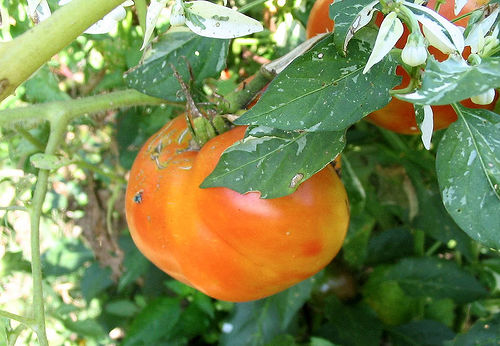

In [5]:
ripe_tom = list(data_path.glob('ripe/*.jpg'))
PIL.Image.open(str(ripe_tom[5]))

In [6]:
unripe_tom = list(data_path.glob('unripe/*.jpg'))
unripe_tom[:5]

[PosixPath('/home/el-sunais/devProjects/tomato_detection/datasets/unripe/unripe161.jpg'),
 PosixPath('/home/el-sunais/devProjects/tomato_detection/datasets/unripe/unripe131.jpg'),
 PosixPath('/home/el-sunais/devProjects/tomato_detection/datasets/unripe/unripe91.jpg'),
 PosixPath('/home/el-sunais/devProjects/tomato_detection/datasets/unripe/unripe26.jpg'),
 PosixPath('/home/el-sunais/devProjects/tomato_detection/datasets/unripe/unripe10.jpg')]

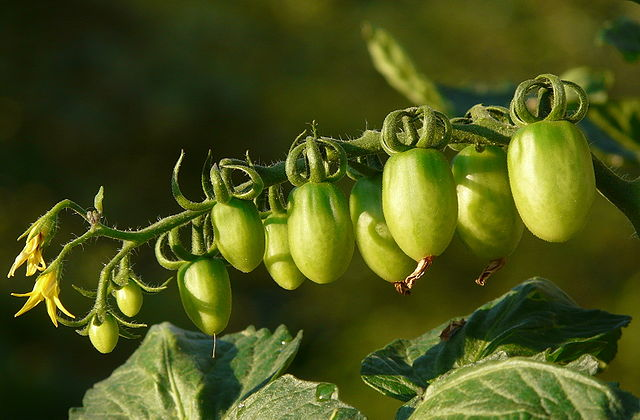

In [7]:
unripe_tom = list(data_path.glob('unripe/*.jpg'))
PIL.Image.open(str(unripe_tom[5]))

In [8]:
tom_dic = {
    'ripe' : list(data_path.glob('ripe/*.jpg')),
    'unripe' : list(data_path.glob('unripe/*.jpg')),
}

In [9]:
print('ripe path')
print(tom_dic['ripe'][:3])
print('unripe path')
print(tom_dic['unripe'][:3])

ripe path
[PosixPath('/home/el-sunais/devProjects/tomato_detection/datasets/ripe/ripe177.jpg'), PosixPath('/home/el-sunais/devProjects/tomato_detection/datasets/ripe/ripe197.jpg'), PosixPath('/home/el-sunais/devProjects/tomato_detection/datasets/ripe/ripe10.jpg')]
unripe path
[PosixPath('/home/el-sunais/devProjects/tomato_detection/datasets/unripe/unripe161.jpg'), PosixPath('/home/el-sunais/devProjects/tomato_detection/datasets/unripe/unripe131.jpg'), PosixPath('/home/el-sunais/devProjects/tomato_detection/datasets/unripe/unripe91.jpg')]


In [10]:
label_dic = {
    'ripe' : 0,
    'unripe' : 1,
}

In [11]:
X, y = [], []

for tom_name, images in tom_dic.items():
    for image in images:
        img = cv2.imread(str(image))
        resize_img = cv2.resize(img, (224, 224))
        X.append(resize_img)
        y.append(label_dic[tom_name])

In [12]:
X[5].shape

(224, 224, 3)

In [13]:
y[5]

0

In [14]:
X = np.array(X)
y = np.array(y)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [16]:
print('X_train Samples=', len(X_train))
print('X_test Samples=', len(X_test))
print('y_train Samples=', len(y_train))
print('y_test  Samples=', len(y_test))

X_train Samples= 297
X_test Samples= 99
y_train Samples= 297
y_test  Samples= 99


In [17]:
X_train_Scale = X_train/255
X_test_Scale = X_test/255

In [18]:
num_classes = 2

cnn_model = Sequential([
    layers.Conv2D(16, 3, activation='relu'),
    #layers.MaxPool2D(),
    
    layers.Flatten(),
    
        layers.Dense(32, activation='relu'),
        layers.Dense(num_classes)
])

2022-07-02 01:19:29.851967: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/el-sunais/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-07-02 01:19:29.851988: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-02 01:19:29.852008: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (el-sunais): /proc/driver/nvidia/version does not exist
2022-07-02 01:19:29.852746: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
cnn_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

cnn_model.fit(X_train_Scale, y_train, epochs=30)

Epoch 1/30
10/10 [==============================] - 6s 476ms/step - loss: 12.3030 - accuracy: 0.7071
Epoch 2/30
10/10 [==============================] - 5s 483ms/step - loss: 0.8311 - accuracy: 0.9125
Epoch 3/30
10/10 [==============================] - 5s 509ms/step - loss: 0.5488 - accuracy: 0.9259
Epoch 4/30
10/10 [==============================] - 5s 522ms/step - loss: 0.2500 - accuracy: 0.9697
Epoch 5/30
10/10 [==============================] - 5s 456ms/step - loss: 0.1185 - accuracy: 0.9865
Epoch 6/30
10/10 [==============================] - 4s 415ms/step - loss: 0.1436 - accuracy: 0.9596
Epoch 7/30
10/10 [==============================] - 4s 404ms/step - loss: 0.0466 - accuracy: 0.9865
Epoch 8/30
10/10 [==============================] - 4s 417ms/step - loss: 0.0601 - accuracy: 0.9865
Epoch 9/30
10/10 [==============================] - 4s 422ms/step - loss: 0.7356 - accuracy: 0.8889
Epoch 10/30
10/10 [==============================] - 4s 433ms/step - loss: 0.2981 - accuracy: 0.949

In [20]:
y_pred = np.argmax(cnn_model.predict(X_test_Scale), axis=1)

cls_rpt = classification_report(y_test, y_pred)
print(cls_rpt)

4/4 [==============================] - 0s 81ms/step
              precision    recall  f1-score   support

           0       0.90      0.83      0.86        53
           1       0.82      0.89      0.85        46

    accuracy                           0.86        99
   macro avg       0.86      0.86      0.86        99
weighted avg       0.86      0.86      0.86        99

